[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: Quickstart

This notebook provides a quick introduction to the package

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")


Welcome to MultiMin v0.5.12


## Distribution basics

### Univariate normal distibution

The most simple gaussians are univariate normal distributions. Let's create a distribution combining two normal distributions:

In [38]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

Now we can plot a sample of the distribution:

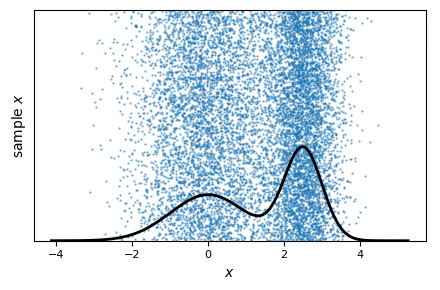

In [48]:
G = CMND.plot_sample(
    props=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_sample_hist.png')

You can generate samples:

In [51]:
sample = CMND.rvs(5000)
sample[:10]

array([[ 0.46298567],
       [ 2.18342426],
       [-0.99598898],
       [ 0.97698777],
       [ 1.53665089],
       [ 1.83364277],
       [-0.09791765],
       [ 1.99598473],
       [ 1.82286393],
       [ 0.50456377]])

Or calculate the pdf value:

In [52]:
CMND.pdf(1.3)

0.10807882631874657

### Multivariate distributions

The real power of `MultiMin` is to combinate multivariate normal distributions. For instante, below we compose two threevariated normal distributions:

In [54]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)
CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

Let's preview the distribution

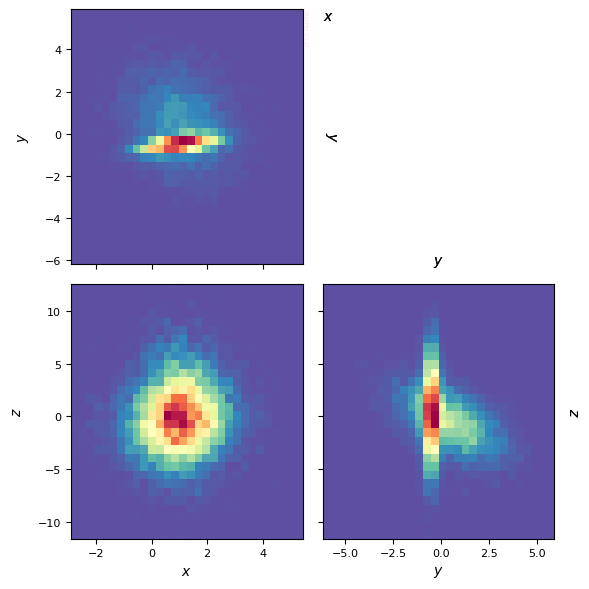

In [61]:
fig = CMND.plot_sample(
    figsize=3,
    props=["x", "y", "z"],
    hargs=dict(bins=30,cmap='Spectral_r', alpha=1)
)

Another way to represent the distribution is using the so-called `DensityPlot`. For this purpose we need a sample:

In [62]:
data = CMND.rvs(5000)

And then plot the sample:

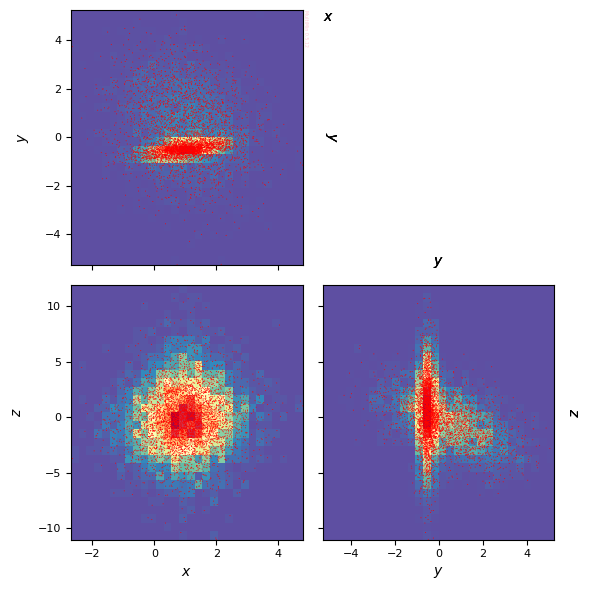

In [68]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
    z=dict(label=r"$z$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(data,**hargs)

sargs=dict(s=0.5,edgecolor='None',color='r')
hist=G.scatter_plot(data,**sargs)

plt.savefig('gallery/quickstart_data_density_scatter.png')


We can also show the distribution of data points in sample in 3D:

In [118]:
fig = go.Figure(
    data=go.Scatter3d(
        x=sample[:, 0],
        y=sample[:, 1],
        z=sample[:, 2],
        mode="markers",
        marker={
            "size": 2,
            "color": sample[:, 2],
            "colorscale": "Viridis",
            "showscale": False,
        },
    )
)

fig.update_layout(
    scene={
        "xaxis_title": properties["x"]["label"].replace("$", ""),
        "yaxis_title": properties["y"]["label"].replace("$", ""),
        "zaxis_title": properties["z"]["label"].replace("$", ""),
        "aspectmode": "cube",
    },
    showlegend=False,
)

fig.show()

`DensityPlot` can also be used in the case of univariate distributions:

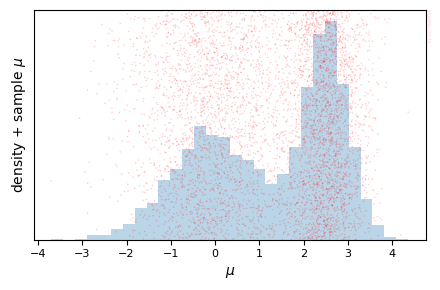

In [119]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

sample = CMND.rvs(5000)

properties=dict(
    x=dict(label=r"$\mu$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)

G.plot_hist(
    sample,
    **dict(bins=30,cmap='Spectral_r', alpha=0.3),
)

sargs=dict(s=1.2,edgecolor='None',color='r')
G.scatter_plot(
    sample,
    **dict(s=1.2,edgecolor='None',color='r',alpha=0.2),
)
plt.savefig('gallery/quickstart_univariate_density_2gauss.png')

## Fittind data with CMND

### Univariate normals

The goal of `MultiMin` is to fit a CMND to a given dataset. Let's start with a univariate dataset. Although it may seem a trick, we will generate data using a CMND:

[]

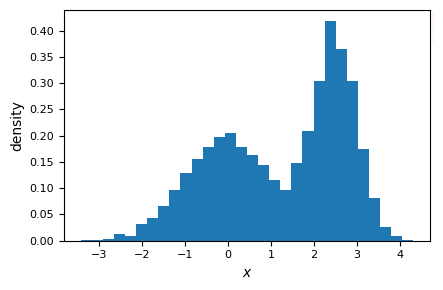

In [127]:
# Create the distribution
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

# Generate data
sample = CMND.rvs(10000)

# Plot the data
G = mn.DensityPlot(dict(x=dict(label=r"$x$",range=None)),figsize=3)
G.plot_hist(sample,**dict(bins=30))
plt.savefig('gallery/quickstart_univariate_histogram.png')

Let's fit it with a single Gaussian:

In [128]:
F = mn.FitCMND(ngauss=1, nvars=1)

Run the fitting procedure:

In [129]:
F.fit_data(sample, advance=True)
# F.fit_data(sample)

Iterations:
Iter 0:
	Vars: [1.2, -1.7]
	LogL/N: 1.8171606226482422
Iter 1:
	Vars: [1.2, -1.7]
	LogL/N: 1.8171605847830854
Iter 2:
	Vars: [1.2, -1.7]
	LogL/N: 1.8171605847830854


Let's plot the result of the fit:

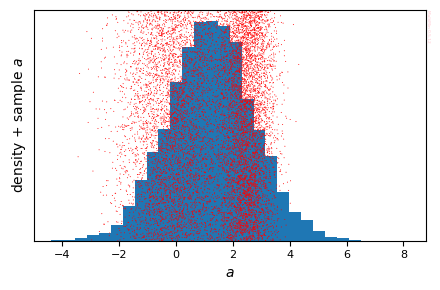

In [130]:
F.plot_fit(
    hargs=dict(bins=30,cmap='Spectral_r'),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_fit_1gauss.png')

Naturally, the fit is not perfect. Now we can fit with two gaussians:

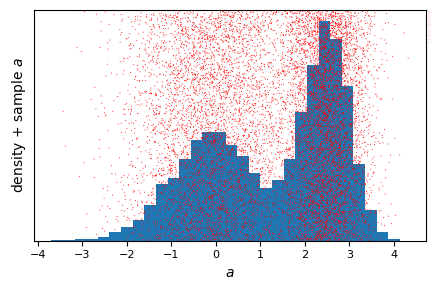

In [133]:
F = mn.FitCMND(ngauss=2, nvars=1)
F.fit_data(sample)
F.plot_fit(
    hargs=dict(bins=30,cmap='Spectral_r'),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)

A visual inspection demonstrate that the fitted distribution (histogram), reproduces well the distribution of the sample points. However, a more precise comparison is required to judge the quality of the fit.

In [140]:
CMND.tabulate('distance')

,w,mu_1,sigma_1
component,,,
1,0.5,0.0,1.0
2,0.5,2.5,0.5


In [141]:
F.cmnd.tabulate('distance')

,w,mu_1,sigma_1
component,,,
2,0.495755,-0.032657,0.987431
1,0.504245,2.502802,0.500822


Which confirme the result of the visual inspection.

### Multivariate data

We can repeat a similar set of test for the case of a multivariate data:

In [142]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

sample = CMND.rvs(5000)

We can fit with only one multivariate normal:

In [143]:
F = mn.FitCMND(ngauss=1, nvars=3)
F.fit_data(data, advance=True)

Iterations:
Iter 0:
	Vars: [1.3, 0.24, 0.22, -2, -1.6, -0.61, 0.9, 0.84, 0.17]
	LogL/N: 5.6785817417332884
Iter 1:
	Vars: [1.1, 0.039, 0.15, -2.1, -1.9, -0.92, 0.23, 0.27, 0.22]
	LogL/N: 5.445224724550664
Iter 2:
	Vars: [0.99, -0.026, 0.026, -2.3, -2, -0.96, -0.28, 0.088, -0.51]
	LogL/N: 5.295724921496005
Iter 3:
	Vars: [1, -0.042, 0.013, -2.3, -2, -0.95, -0.24, 0.081, -0.63]
	LogL/N: 5.292545968710659
Iter 4:
	Vars: [1, -0.04, 0.014, -2.3, -2, -0.95, -0.24, 0.083, -0.64]
	LogL/N: 5.292517045014111
Iter 5:
	Vars: [1, -0.04, 0.014, -2.3, -2, -0.95, -0.24, 0.083, -0.64]
	LogL/N: 5.292517045014111


Check the results:

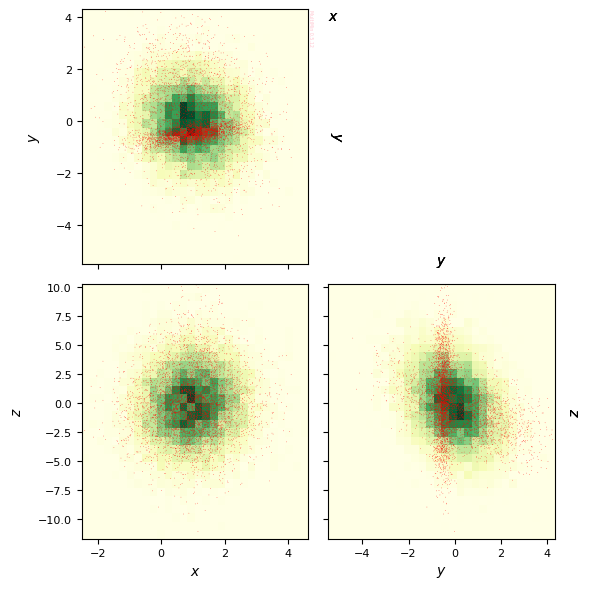

In [144]:
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_2gauss_3d.png')


Not good. Let's try with two gaussians:

Iterations:
Iter 0:
	Vars: [0, 0, 2.3, 1.5, -2.2, 0.95, -0.71, 1.6, -1.6, -1.6, -0.24, -2.2, -2.8, -0.74, 0.89, 0.53, -0.12, 1.3, 0.79, 0.34]
	LogL/N: 5.629090118111741
Iter 1:
	Vars: [-0.9, 0.0017, 1.1, 0.86, -0.92, 0.95, -0.5, 0.3, -1.8, -1.5, -1.4, -2.3, -3.6, -0.66, -0.36, -0.0073, -1.3, 1.2, 0.2, 0.12]
	LogL/N: 4.957862862860248
Iter 2:
	Vars: [-0.36, 0.0011, 0.95, 0.68, -0.65, 1, -0.5, 0.48, -2.1, -1.7, -1.3, -2.5, -3.7, -0.73, -0.34, 0.15, -1.2, 1.2, 0.027, 0.053]
	LogL/N: 4.871195328698306
Iter 3:
	Vars: [-0.13, 0.00094, 0.96, 0.5, -0.53, 1, -0.5, 0.49, -2.1, -1.7, -1.4, -2.5, -3.7, -0.72, -0.42, 0.2, -1.1, 1.2, -0.0099, 0.039]
	LogL/N: 4.862401093385808
Iter 4:
	Vars: [-0.039, 0.00087, 0.98, 0.44, -0.49, 1, -0.5, 0.5, -2.1, -1.8, -1.4, -2.5, -3.7, -0.71, -0.44, 0.21, -1.1, 1.2, -0.017, 0.037]
	LogL/N: 4.861403772856998
Iter 5:
	Vars: [-0.0081, 0.00087, 0.99, 0.43, -0.48, 1, -0.5, 0.5, -2.1, -1.8, -1.4, -2.5, -3.7, -0.71, -0.45, 0.21, -1.1, 1.2, -0.018, 0.038]
	LogL/N: 4.861292

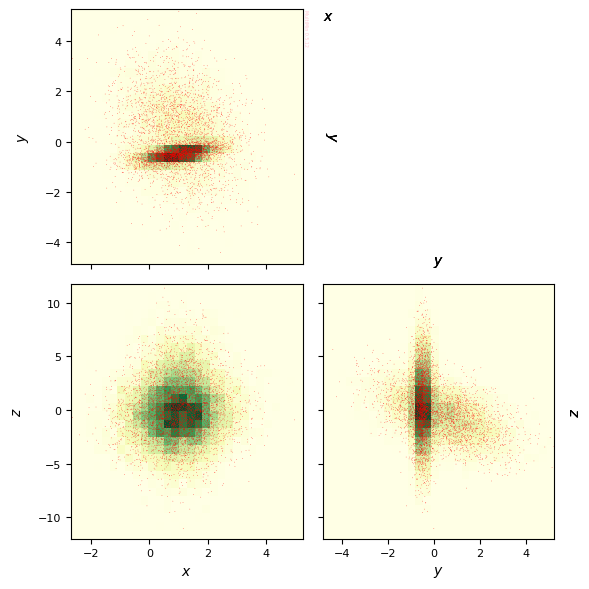

In [145]:
F = mn.FitCMND(ngauss=2, nvars=3)
F.fit_data(data, advance=True)
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_result_3d.png')


Much better!

Check the initial and final distributions:

For comparison, let's see the centers of the CMNDs, the original and the fitted one:

In [146]:
CMND.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,1.0,0.5,-0.5,1.064392,1.510773,2.077169,-0.211137,0.101191,-0.534075
2,0.5,1.0,-0.5,0.5,0.788611,0.241023,3.300000,0.539822,0.000000,0.000000


In [147]:
F.cmnd.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.498872,0.990074,0.426853,-0.479616,1.076480,1.477482,2.035916,-0.221270,0.106652,-0.511832
2,0.501128,0.999134,-0.500455,0.502036,0.756107,0.237449,3.289113,0.549074,-0.008779,0.018933


The coincidence is expected

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga